In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import hydrofunctions as hf
import matplotlib.pyplot as plt
from shapely import geometry as sgeom
import folium 
%matplotlib inline

In [2]:
# Choose a domain
domain = 'BEAU'

# Path to the SnowModel folder
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# SE AK
# domain_list = ['JUNE','KLAW','SITK','TAKU']
# arctic
# domain_list = ['BEAU', 'BRIS','CHUK','YUKO']
domain_list = ['BEAU']
# all domains have the same start date
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

# get USGS station data

In [3]:
# get database of USGS stations in the state of alaska
alaska = hf.NWIS(None,'dv', st_dt,ed_dt,parameterCd='00060',stateCd='AK', file='Q.parquet')
# build discharge dataframe
# gives discharge timeseries for each gague
akQ = alaska.df('discharge')
# list of station IDs
fullstnlist = [val[5:13] for val in akQ.columns]

# get lat lon for each station and build dataframe of metadata
for i in range(len(fullstnlist)):
    stn = fullstnlist[i]
    if i ==0:
        # individual station metadata in a df
        dfs = hf.site_file(stn).table
    else:
        try:
            output = hf.site_file(stn).table
            # add individual station to large df
            dfs = pd.concat([dfs, output])
        except:
            continue
# turn dataframe into geodataframe containing station metadata
gdfs = gpd.GeoDataFrame(dfs,geometry=gpd.points_from_xy(dfs.dec_long_va, dfs.dec_lat_va),crs='epsg:4326')


Reading data from Q.parquet
Retrieved the site file for site #15008000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15008000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15009000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15009000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15015595 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15015595&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15019990 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15019990&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15022000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15022000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15024800 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15024800&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15028300 from https://wate

Retrieved the site file for site #15238500 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238500&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238600 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238600&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238648 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238648&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238820 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238820&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238978 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238978&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238982 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238982&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238984 from https://waterservices.usgs.gov/nwis/site

In [5]:
akQ

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15015595:00060:00003,USGS:15019990:00060:00003,USGS:15022000:00060:00003,USGS:15024800:00060:00003,USGS:15028300:00060:00003,USGS:15039900:00060:00003,USGS:15040000:00060:00003,USGS:15041200:00060:00003,...,USGS:15862500:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15904800:00060:00003,USGS:15905100:00060:00003,USGS:15906000:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
1988-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,1070.0,71800.0,3570.0,185.0,NaN,15500.0,...,NaN,NaN,190.0,NaN,NaN,NaN,680.0,NaN,NaN,NaN
1988-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,797.0,58900.0,2580.0,159.0,NaN,14000.0,...,NaN,NaN,180.0,NaN,NaN,NaN,640.0,NaN,NaN,NaN
1988-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,730.0,54900.0,2380.0,154.0,NaN,13000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,600.0,NaN,NaN,NaN
1988-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,1170.0,61500.0,4330.0,232.0,NaN,15000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,580.0,NaN,NaN,NaN
1988-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,1630.0,83100.0,4280.0,306.0,NaN,16000.0,...,NaN,NaN,160.0,NaN,NaN,NaN,540.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,1550.0,NaN,5530.0,0.00,NaN,58300.0,NaN,NaN,NaN,8310.0,...,NaN,21700.0,2720.0,NaN,NaN,NaN,1450.0,NaN,NaN,209.0
2020-09-27 00:00:00+00:00,2370.0,NaN,9610.0,18.60,NaN,63700.0,NaN,NaN,NaN,9120.0,...,NaN,19800.0,2330.0,NaN,NaN,NaN,1320.0,NaN,NaN,199.0
2020-09-28 00:00:00+00:00,2230.0,NaN,13500.0,65.00,NaN,90600.0,NaN,NaN,NaN,15500.0,...,NaN,18400.0,1990.0,NaN,NaN,NaN,1260.0,NaN,NaN,192.0


In [14]:
# slice discharge values to time period of interest
akQs = akQ[st_dt:ed_dt]
# drop stations with no data
s = (365-akQs.isnull().apply(sum, axis=0))/len(akQs)
akQslice = akQs[akQs.columns.intersection(s[s>0].index)]
akQslice

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15019990:00060:00003,USGS:15024800:00060:00003,USGS:15041200:00060:00003,USGS:15051010:00060:00003,USGS:15052000:00060:00003,USGS:15052500:00060:00003,USGS:15055500:00060:00003,USGS:15056210:00060:00003,...,USGS:15580095:00060:00003,USGS:15743850:00060:00003,USGS:15744500:00060:00003,USGS:15747000:00060:00003,USGS:15803000:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15905100:00060:00003,USGS:15908000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2013-10-01 00:00:00+00:00,1480.0,570.0,0.0,37900.0,8590.0,34.4,128.0,1060.0,112.0,914.0,...,865.0,13.6,NaN,620.0,620.0,3710.0,850.0,125.0,912.0,145.0
2013-10-02 00:00:00+00:00,1920.0,539.0,0.0,37000.0,8340.0,31.2,105.0,944.0,101.0,891.0,...,780.0,13.4,NaN,610.0,780.0,3080.0,825.0,120.0,860.0,140.0
2013-10-03 00:00:00+00:00,2550.0,430.0,0.0,34500.0,7910.0,36.3,152.0,860.0,95.5,955.0,...,811.0,13.2,NaN,600.0,800.0,2510.0,760.0,115.0,850.0,120.0
2013-10-04 00:00:00+00:00,3880.0,1160.0,0.0,43800.0,9050.0,74.9,257.0,1030.0,135.0,1280.0,...,800.0,13.0,NaN,590.0,730.0,2180.0,670.0,110.0,840.0,110.0
2013-10-05 00:00:00+00:00,2370.0,1570.0,0.0,69200.0,10000.0,94.6,208.0,1360.0,161.0,1190.0,...,792.0,12.7,NaN,580.0,700.0,1970.0,635.0,108.0,830.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-26 00:00:00+00:00,1370.0,1110.0,0.0,79000.0,17400.0,31.5,350.0,2010.0,170.0,902.0,...,1040.0,24.2,17800.0,1210.0,1370.0,11400.0,2550.0,220.0,2140.0,348.0
2014-09-27 00:00:00+00:00,1600.0,1320.0,0.0,74400.0,16700.0,33.6,565.0,2220.0,165.0,1270.0,...,998.0,23.9,17400.0,1090.0,1330.0,9740.0,2490.0,200.0,1830.0,250.0
2014-09-28 00:00:00+00:00,5420.0,3340.0,233.0,138000.0,24800.0,91.1,1290.0,3860.0,267.0,2770.0,...,1030.0,24.0,16800.0,2620.0,1450.0,8020.0,2460.0,180.0,1810.0,220.0


In [15]:
# function to identify stations within the domain. Then gets discharge and 
# metadata for the 10 satation in the domain with the largest upslope areas. 
# gdf is reprojected to model projection.
def get_Q(gdfs, domgdf, proj):
    #index of stations that fall into in the domain
    mask = gdfs.within(domgdf.loc[0].geometry)
    #gdf of stns in the domain
    stnmeta = gdfs.loc[mask]
    # if there are more than 10 stations in the domain
    # select the 10 stations with the largest upslope area
    if len(stnmeta)>10:
        # sort stations by upslope area
        stnmeta = stnmeta.sort_values('drain_area_va',ascending = False)
        # drop duplicates
        stnmeta = stnmeta.drop_duplicates()
        # select 10 largest stations
        stnmeta = stnmeta[0:10]
        # sort stations by station id area
        stnmeta = stnmeta.sort_values('site_no')
    # reset index
    stnmeta = stnmeta.reset_index(drop=True)
    # project gdf to model coordinates
    stnmetaproj=stnmeta.to_crs(proj)
    stnmetaproj = stnmetaproj.reset_index(drop=True)
    # list of column names for stations in domain
    stnQlist = ['USGS:'+val+':00060:00003' for val in stnmeta.site_no.to_list()]
    # dataframe of Q across domain
    Qdf = akQslice[akQslice.columns.intersection(stnQlist)]
    #Qdf = akQ[akQ.columns.intersection(stnQlist)]
    return Qdf, stnmeta, stnmetaproj



In [11]:
# run the functions
for domain in domain_list:
    print(domain)
    # projections
    proj = domains[domain]['mod_proj']
    stn_proj = domains[domain]['stn_proj']
    
    # set input parameters
    if domain == 'BEAU' or domain == 'BRIS' or domain == 'CHUK' or domain == 'YUKO':
        SHAPEpath = '/nfs/attic/dfh/2020_NPRB/data/gis/'+domain+'/'+domain+'.json'
            # open shapefile of interest basin
        domgdf = gpd.read_file(SHAPEpath)
    else:
        # build polygon from domain bounds
        Bbox = domains[domain]['Bbox']
        # Convert the bounding box dictionary to a shapely Polygon geometry using sgeom.box
        box_sgeom = sgeom.box(Bbox['lonmin'], Bbox['latmin'], Bbox['lonmax'], Bbox['latmax'])
        domgdf = gpd.GeoDataFrame(geometry=[box_sgeom], crs=stn_proj)
    
    # get gage data
    Qdf, stnmeta, stnmetaproj = get_Q(gdfs, domgdf, proj)
    

    #save discharge data
    gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
    path = gagepath+domain+'_discharge_cfs_'+st_dt+'_'+ed_dt+'.csv'
    Qdf.to_csv(path)
    
    # save metadata gdfs
    path=gagepath+domain+'_gage_meta_'+st_dt+'_'+ed_dt+'.geojson'
    stnmeta.to_file(path, driver='GeoJSON')  
    path=gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson'
    stnmetaproj.to_file(path, driver='GeoJSON') 

CHUK


/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

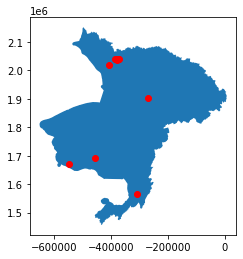

In [12]:
# plot domain shapefile and stations 
# open shapefile of interest basin
fig,ax = plt.subplots()
# add projected coordinates to domain shapefile
domproj = domgdf.to_crs(stnmetaproj.crs)
# plot domain
domproj.plot(ax=ax)
# plot stations
stnmetaproj.plot(ax=ax,c='r')

# single domain

In [21]:
# get USGS stations in the state of alaska
alaska = hf.NWIS(None,'dv', domains[domain]['st'],domains[domain]['ed'],parameterCd='00060',stateCd='AK', file='Q.parquet')
alaska

Reading data from Q.parquet


USGS:15008000: SALMON R NR HYDER AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15009000: SOULE R NR HYDER AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15015595: UNUK R BL BLUE R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15019990: TYEE LK OUTLET NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15022000: HARDING R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15024800: STIKINE R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15028300: FARRAGUT R NR PETERSBURG AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15039900: DOROTHY LK OUTLET NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15040000: DOROTHY C NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15041200: TAKU R NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15049900: GOLD C NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet 

In [22]:
# build discharge dataframe
akQ = alaska.df('discharge')
akQ

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15015595:00060:00003,USGS:15019990:00060:00003,USGS:15022000:00060:00003,USGS:15024800:00060:00003,USGS:15028300:00060:00003,USGS:15039900:00060:00003,USGS:15040000:00060:00003,USGS:15041200:00060:00003,...,USGS:15862500:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15904800:00060:00003,USGS:15905100:00060:00003,USGS:15906000:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
1988-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,1070.0,71800.0,3570.0,185.0,NaN,15500.0,...,NaN,NaN,190.0,NaN,NaN,NaN,680.0,NaN,NaN,NaN
1988-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,797.0,58900.0,2580.0,159.0,NaN,14000.0,...,NaN,NaN,180.0,NaN,NaN,NaN,640.0,NaN,NaN,NaN
1988-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,730.0,54900.0,2380.0,154.0,NaN,13000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,600.0,NaN,NaN,NaN
1988-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,1170.0,61500.0,4330.0,232.0,NaN,15000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,580.0,NaN,NaN,NaN
1988-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,1630.0,83100.0,4280.0,306.0,NaN,16000.0,...,NaN,NaN,160.0,NaN,NaN,NaN,540.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,1550.0,NaN,5530.0,0.00,NaN,58300.0,NaN,NaN,NaN,8310.0,...,NaN,21700.0,2720.0,NaN,NaN,NaN,1450.0,NaN,NaN,209.0
2020-09-27 00:00:00+00:00,2370.0,NaN,9610.0,18.60,NaN,63700.0,NaN,NaN,NaN,9120.0,...,NaN,19800.0,2330.0,NaN,NaN,NaN,1320.0,NaN,NaN,199.0
2020-09-28 00:00:00+00:00,2230.0,NaN,13500.0,65.00,NaN,90600.0,NaN,NaN,NaN,15500.0,...,NaN,18400.0,1990.0,NaN,NaN,NaN,1260.0,NaN,NaN,192.0


In [23]:
#list of stations
fullstnlist = [val[5:13] for val in akQ.columns]

# get lat lon for each station and build dataframe of metadata
for i in range(len(fullstnlist)):
    stn = fullstnlist[i]
    if i ==0:
        dfs = hf.site_file(stn).table
    else:
        try:
            output = hf.site_file(stn).table
            dfs = pd.concat([dfs, output])
        except:
            continue
dfs

Retrieved the site file for site #15008000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15008000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15009000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15009000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15015595 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15015595&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15019990 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15019990&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15022000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15022000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15024800 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15024800&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15028300 from https://waterservices.usgs.gov/nwis/site

Retrieved the site file for site #15238500 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238500&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238600 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238600&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238648 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238648&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238820 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238820&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238978 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238978&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238982 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238982&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238984 from https://waterservices.usgs.gov/nwis/site

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,15008000,SALMON R NR HYDER AK,ST,560134.0,1300355.0,56.025815,-130.066982,M,R,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15009000,SOULE R NR HYDER AK,ST,555000.0,1301054.0,55.833029,-130.183369,M,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK,ST,561426.0,1305249.0,56.240206,-130.881986,M,R,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK,ST,561200.0,1313024.0,56.199641,-131.508362,M,S,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15022000,HARDING R NR WRANGELL AK,ST,561248.0,1313812.0,56.212978,-131.638359,M,T,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,USGS,15906000,SAGAVANIRKTOK R TRIB NR PUMP STA 3 AK,ST,684113.0,1490542.0,68.686574,-149.097790,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# turn dataframe into geodataframe
gdfs = gpd.GeoDataFrame(dfs,geometry=gpd.points_from_xy(dfs.dec_long_va, dfs.dec_lat_va),crs='epsg:4326')
gdfs

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15008000,SALMON R NR HYDER AK,ST,560134.0,1300355.0,56.025815,-130.066982,M,R,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.06698 56.02582)
0,USGS,15009000,SOULE R NR HYDER AK,ST,555000.0,1301054.0,55.833029,-130.183369,M,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.18337 55.83303)
0,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK,ST,561426.0,1305249.0,56.240206,-130.881986,M,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.88199 56.24021)
0,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK,ST,561200.0,1313024.0,56.199641,-131.508362,M,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-131.50836 56.19964)
0,USGS,15022000,HARDING R NR WRANGELL AK,ST,561248.0,1313812.0,56.212978,-131.638359,M,T,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-131.63836 56.21298)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,USGS,15906000,SAGAVANIRKTOK R TRIB NR PUMP STA 3 AK,ST,684113.0,1490542.0,68.686574,-149.097790,M,U,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-149.09779 68.68657)
0,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-148.81778 69.01583)
0,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-146.38870 69.88171)
0,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-145.59559 69.86506)


<AxesSubplot:>

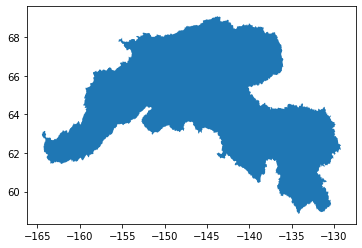

In [25]:
# open shapefile of interest basin
h2sdpath = '/nfs/attic/dfh/2020_NPRB/data/gis/'+domain+'/'+domain+'.json'
domgdf = gpd.read_file(hucSHAPEpath)
domgdf.plot()

In [28]:
#index of stations that fall into in the domain
mask = gdfs.within(domgdf.loc[0].geometry) 
mask

0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Length: 279, dtype: bool

In [29]:
#gdf of stns in the domain
instn = gdfs.loc[mask]
instn = instn.reset_index(drop=True)


,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15310002,MOSQUITO FORK 2 MI BL KECHUMSTUK C NR CHICKEN AK,ST,640204.0,1423142.00,64.034444,-142.528333,N,S,...,C,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (557011.346 1611552.334)
1,USGS,15320100,WADE C TRIB NR CHICKEN AK,ST,640706.0,1413313.00,64.118012,-141.555895,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (601958.587 1629216.681)
2,USGS,15330000,NF FORTYMILE R AB MF NR FRANKLIN AK,ST,642800.6,1421258.50,64.466833,-142.216250,M,U,...,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (563488.970 1661708.835)
3,USGS,15331000,MF FORTYMILE R NR MOUTH NR CHICKEN AK,ST,642815.1,1421317.40,64.470861,-142.221500,G,5,...,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (563161.264 1662106.684)
4,USGS,15348000,FORTYMILE R NR STEELE CREEK AK,ST,641833.0,1412408.00,64.308855,-141.404517,M,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (605177.726 1651517.276)
5,USGS,15356000,YUKON R AT EAGLE AK,ST,644722.0,1411152.00,64.789168,-141.200089,M,T,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (604614.263 1705991.348)
6,USGS,15388030,NATION R NR NATION AK,ST,651423.0,1413910.00,65.239431,-141.655152,M,T,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (574094.074 1751256.009)
7,USGS,15388060,KANDIK R NR NATION AK,ST,652344.0,1422541.00,65.395244,-142.430455,M,T,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (535407.292 1761861.519)
8,USGS,15388070,KANDIK R BL THREEMILE C NR NATION AK,ST,652308.0,1422641.00,65.385243,-142.447121,G,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (534836.709 1760629.847)
9,USGS,15389100,PORCUPINE R 9.5MI AB MOUTH NR FORT YUKON AK,ST,663906.5,1450547.50,66.651468,-145.099148,G,5,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (394082.050 1881332.630)


In [ ]:
# if there are more than 10 stations 
# select the 10 stations with the largest upslope area
if len(instn) > 10:
    # sort stations by upslope area
    instn = instn.sort_values('drain_area_va',ascending = False)
    # select 10 largest stations
    instn = instn[0:10]
    # sort stations by station id area
    instn = instn.sort_values('site_no')
    # reset index
    instn=instn.reset_index(drop=True)

In [ ]:
# project gdf to model coordinates
stnproj=instn.to_crs(domains[domain]['mod_proj'])
stnproj = stnproj.reset_index(drop=True)

stnproj

In [19]:
# save domain discharge data for later use
# list of column names for stations in domain
stnQlist = ['USGS:'+val+':00060:00003' for val in instn.site_no.to_list()]
# dataframe of Q across domain
indf = akQ[akQ.columns.intersection(stnQlist)]
path = gagepath+domain+'_discharge_cfs.csv'
indf.to_csv(path)

In [14]:
# save metadata
path=gagepath+domain+'_gage_meta.geojson'
instn.to_file(path, driver='GeoJSON')  
path=gagepath+domain+'_gage_meta_proj.geojson'
stnproj.to_file(path, driver='GeoJSON') 

/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
